## Task 1

In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading dataset
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


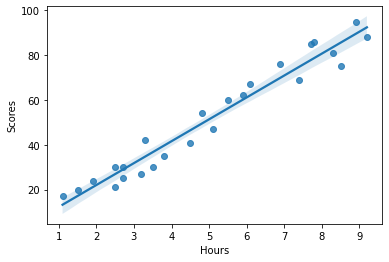

In [4]:
# visualizing data 
ax = sns.regplot(x="Hours", y="Scores", data=data)

In [5]:
# independent variable / feature
X = data[['Hours']]

In [6]:
# dependent variable / target
y= data[['Scores']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test , y_train ,y_test = train_test_split(X,y,test_size=.15, random_state=42)

In [9]:
# standardisation
x_train.shape

(21, 1)

In [10]:
# standardising dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
x_train =scaler.fit_transform(x_train)

In [12]:
x_test = scaler.transform(x_test)

### Model buliding

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(x_train,y_train)

LinearRegression()

### Prediction

In [18]:
regr_pred = regression.predict(x_test)

In [19]:
regr_pred

array([[83.33366331],
       [27.09319812],
       [27.09319812],
       [69.75837861]])

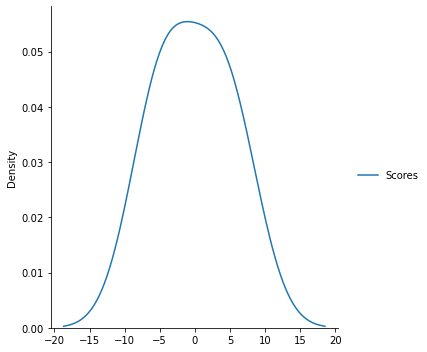

In [20]:
import seaborn as sns
sns.displot(regr_pred - y_test ,kind='kde')

In [21]:
from sklearn.metrics import r2_score

In [22]:
score = r2_score(regr_pred, y_test )

In [40]:
score*100

96.45429068004115

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
mse = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [26]:
np.mean(mse)

-39.15775300990705

### Checking predictions

In [28]:
test1= scaler.transform([[4.5]])

In [29]:
regression.predict(test1)

array([[46.48646198]])

In [30]:
test2 =scaler.transform([[6]])

In [31]:
regression.predict(test2)

array([[61.03140987]])

In [32]:
# 9.25 hours of study
test3 =scaler.transform([[9.25]])

In [33]:
regression.predict(test3)

array([[92.54546365]])

## Predicted scores is 92.54% for 9.25 hrs of study

In [34]:
test4 =scaler.transform([[9.5]])
regression.predict(test4)

array([[94.96962163]])

In [ ]:
while True:
    z = eval(input('input no. of study  hours = '))
    s=scaler.transform([[z]])
    print('Score obtained',regression.predict(s))
    print()

input no. of study  hours = 5
Score obtained [[51.33477794]]



In [35]:
# Pickling model
import pickle

In [36]:
# creating model
model = pickle.dump(regression,open('TSF_regression.pkl', 'wb'))

In [37]:
# Loading model
model1 = pickle.load(open('TSF_regression.pkl','rb'))

In [ ]:
# prediction through model
model1.predict(scaler.transform([[eval(input('study hours = '))]]))